In [165]:
import pandas as pd
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [166]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [167]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [168]:
#actually there are 891 value to be
#but in age and cabin there are missing values
#Note: if less than 60% data is present it will hamper your accutracy
#will try tto drop the cabin

In [169]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [170]:
#same is happening with the test will drop cabin from here also

In [171]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [172]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [173]:
#since Embarked is a categorical value will fill it woht its hoghest occurances which is mode
mode_Emb = train['Embarked'].mode()[0]
train['Embarked'].fillna(mode_Emb, inplace=True)

mode_Emb = test['Embarked'].mode()[0]
test['Embarked'].fillna(mode_Emb, inplace=True)

C:\Users\viren\AppData\Local\Temp\ipykernel_8852\680917996.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(mode_Emb, inplace=True)
C:\Users\viren\AppData\Local\Temp\ipykernel_8852\680917996.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [174]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [175]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [176]:
#fare numerical so used mean

In [177]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

C:\Users\viren\AppData\Local\Temp\ipykernel_8852\3411113445.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].mean(),inplace=True)


In [178]:
import seaborn as sns

In [179]:
#Age: i will try to put value between mean-SD and mean+SD
low_train=(train['Age'].mean()-train['Age'].std())
up_train=(train['Age'].mean()+train['Age'].std())

low_test=(test['Age'].mean()-test['Age'].std())
up_test=(test['Age'].mean()+test['Age'].std())

In [180]:
#177 values to bee generated
import numpy as np
train_age=np.random.randint(low_train,up_train,177)
train_age

array([43, 28, 24, 28, 24, 43, 27, 40, 25, 20, 38, 15, 26, 22, 30, 41, 33,
       42, 43, 40, 37, 19, 15, 29, 30, 25, 41, 24, 23, 43, 26, 43, 20, 39,
       38, 29, 41, 16, 38, 34, 37, 17, 32, 21, 42, 33, 27, 37, 20, 36, 32,
       27, 30, 43, 28, 23, 40, 36, 39, 30, 28, 35, 32, 23, 29, 21, 26, 28,
       38, 41, 23, 24, 28, 22, 25, 20, 23, 33, 32, 27, 28, 31, 26, 31, 22,
       21, 40, 23, 40, 22, 20, 40, 32, 32, 28, 41, 37, 33, 29, 25, 42, 22,
       37, 32, 37, 32, 29, 35, 25, 38, 30, 41, 20, 36, 33, 21, 38, 34, 34,
       43, 38, 18, 36, 35, 26, 33, 43, 18, 42, 21, 21, 37, 25, 33, 41, 20,
       40, 20, 43, 22, 17, 21, 39, 16, 20, 19, 41, 20, 26, 29, 15, 41, 40,
       37, 30, 33, 40, 41, 40, 20, 26, 31, 42, 26, 29, 43, 35, 38, 36, 25,
       16, 33, 40, 35, 27, 16, 31])

In [181]:
#86 values for test
test_age=np.random.randint(low_test,up_test,86)
test_age

array([17, 37, 26, 20, 24, 25, 27, 21, 30, 34, 41, 42, 22, 29, 31, 33, 37,
       41, 20, 17, 21, 40, 18, 28, 16, 23, 29, 36, 20, 37, 33, 17, 21, 24,
       26, 22, 26, 17, 16, 19, 30, 30, 16, 24, 18, 25, 33, 35, 19, 22, 43,
       20, 41, 37, 41, 24, 30, 37, 27, 21, 38, 16, 24, 40, 31, 25, 30, 33,
       39, 38, 17, 37, 25, 26, 23, 26, 20, 23, 18, 20, 37, 26, 40, 39, 35,
       38])

In [182]:
train['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [183]:
train['Age'][train['Age'].isnull()]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [184]:
train['Age'][train['Age'].isnull()]=train_age

C:\Users\viren\AppData\Local\Temp\ipykernel_8852\4268069075.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train['Age'][train['Age'].isnull()]=train_age
C:\Users\viren\AppData\Local\Temp\ipykernel_8852\4268069075.py:1: SettingWithCopyWa

In [185]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [186]:
#same with test now
test['Age'][test['Age'].isnull()]=test_age

C:\Users\viren\AppData\Local\Temp\ipykernel_8852\1609622588.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['Age'][test['Age'].isnull()]=test_age
C:\Users\viren\AppData\Local\Temp\ipykernel_8852\1609622588.py:2: SettingWithCopyWarni

In [187]:
#EDA

In [188]:
#wil se relation woth Pclass
train[train['Pclass']==3]['Survived'].value_counts()

Survived
0    372
1    119
Name: count, dtype: int64

In [189]:
train[train['Pclass']==2]['Survived'].value_counts()

Survived
0    97
1    87
Name: count, dtype: int64

In [190]:
train[train['Pclass']==1]['Survived'].value_counts()

Survived
1    136
0     80
Name: count, dtype: int64

In [191]:
train.groupby(['Pclass','Survived']).count()

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass Survived                                                            
1      0                  80    80   80   80     80     80      80    80   
       1                 136   136  136  136    136    136     136   136   
2      0                  97    97   97   97     97     97      97    97   
       1                  87    87   87   87     87     87      87    87   
3      0                 372   372  372  372    372    372     372   372   
       1                 119   119  119  119    119    119     119   119   

                 Embarked  
Pclass Survived            
1      0               80  
       1              136  
2      0               97  
       1               87  
3      0              372  
       1              119

In [192]:
#but percentage will gie us simple result
train.groupby(['Pclass'])['Survived'].mean()


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [193]:
#so there is relation between survide and Pclass

In [194]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [195]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

C:\Users\viren\AppData\Local\Temp\ipykernel_8852\1253490685.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])


<Axes: xlabel='Age', ylabel='Density'>

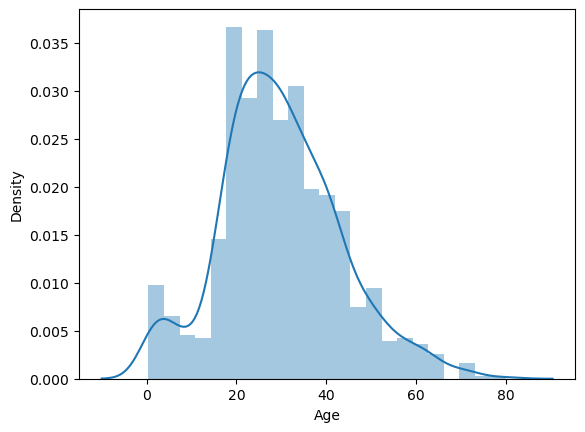

In [196]:
#let print age distribution plot
sns.distplot(train['Age'])

C:\Users\viren\AppData\Local\Temp\ipykernel_8852\2751576055.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0])


<Axes: xlabel='Age', ylabel='Density'>

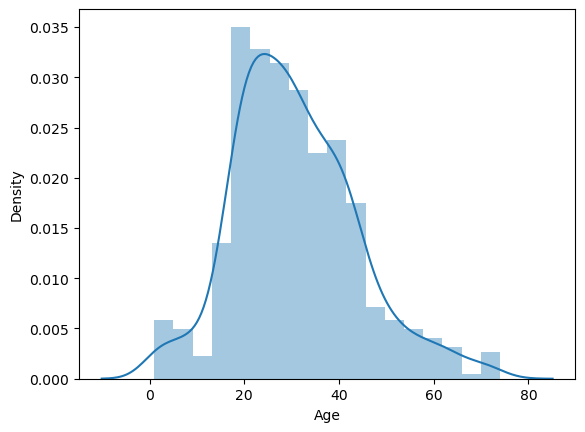

In [197]:
#above plot is bimodal as it is having two peaks
#now age plot who not survived
sns.distplot(train['Age'][train['Survived']==0])

In [198]:
#as peak of the childs is gonne means they are died less

C:\Users\viren\AppData\Local\Temp\ipykernel_8852\1682218632.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0])
C:\Users\viren\AppData\Local\Temp\ipykernel_8852\1682218632.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==1])


<Axes: xlabel='Age', ylabel='Density'>

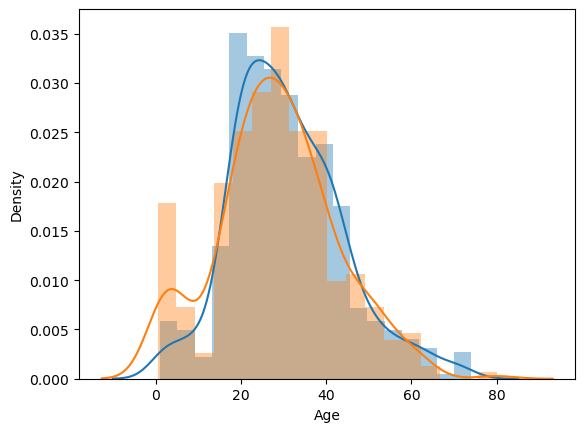

In [199]:
#now llets compare survived and not survived
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

C:\Users\viren\AppData\Local\Temp\ipykernel_8852\2535625892.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==0])
C:\Users\viren\AppData\Local\Temp\ipykernel_8852\2535625892.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==1]

<Axes: xlabel='Fare', ylabel='Density'>

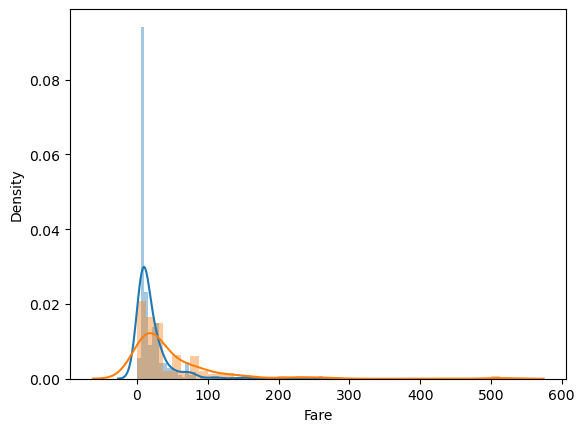

In [200]:
#now same with Fare
sns.distplot(train['Fare'][train['Survived']==0])
sns.distplot(train['Fare'][train['Survived']==1])

In [201]:
#shows less price ticket are having less survival chances

In [202]:
#after this 
#we are dropping "ticket, Name"
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)

In [203]:
train['family']=train['SibSp']+train['Parch']+1

In [204]:
train['family'].value_counts()

family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [205]:
train.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [206]:
def cal(number):
    if number==1:
        return "Alone"
    elif number>1 and number<5:
        return "Medium"
    else:
        return "Large"

In [207]:
train['family_size']=train['family'].apply(cal)

In [208]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium


In [209]:
test['family']=test['SibSp']+test['Parch']+1

In [210]:
test['family_size']=test['family'].apply(cal)

In [211]:
#now family size is doing wprk of SibSp, Parch and family
#so lets drop the
train.drop(columns=['SibSp','Parch','family'],inplace=True)
test.drop(columns=['SibSp','Parch','family'],inplace=True)

In [212]:
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


In [213]:
passengerID=test['PassengerId'].values

In [214]:
train.drop(columns=['Name','PassengerId'],inplace=True)
test.drop(columns=['Name','PassengerId'],inplace=True)

In [215]:
print(train.shape)
print(test.shape)

(891, 7)
(418, 6)


In [216]:
#have to convert categorical clumns to numerical columns
print(train.isnull().sum())
print(train.shape)


Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64
(891, 7)


In [217]:
pd.get_dummies(train,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Medium
0,0,22.0,7.2500,False,True,True,False,True,False,True
1,1,38.0,71.2833,False,False,False,False,False,False,True
2,1,26.0,7.9250,False,True,False,False,True,False,False
3,1,35.0,53.1000,False,False,False,False,True,False,True
4,0,35.0,8.0500,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,True,False,True,False,True,False,False
887,1,19.0,30.0000,False,False,False,False,True,False,False
888,0,31.0,23.4500,False,True,False,False,True,False,True
889,1,26.0,30.0000,False,False,True,False,False,False,False


In [218]:
pd.get_dummies(test,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Medium
0,34.5,7.8292,False,True,True,True,False,False,False
1,47.0,7.0000,False,True,False,False,True,False,True
2,62.0,9.6875,True,False,True,True,False,False,False
3,27.0,8.6625,False,True,True,False,True,False,False
4,22.0,12.2875,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...
413,39.0,8.0500,False,True,True,False,True,False,False
414,39.0,108.9000,False,False,False,False,False,False,False
415,38.5,7.2500,False,True,True,False,True,False,False
416,35.0,8.0500,False,True,True,False,True,False,False


In [219]:
train=pd.get_dummies(train,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [220]:
test=pd.get_dummies(test,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [221]:
test.shape

(418, 9)

In [222]:
train.shape

(891, 10)

In [223]:
X=train.iloc[:,1:].values
y=train.iloc[:,0].values

In [224]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [225]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [226]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [227]:
y_pred=classifier.predict(X_test)

In [228]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7821229050279329

In [229]:
#now on test datset

In [230]:
Xf=test.iloc[:,:].values

In [231]:
y_final=classifier.predict(Xf)

In [232]:
y_final.shape

(418,)

In [233]:
passengerID.shape

(418,)

In [234]:
final=pd.DataFrame()

In [237]:
final['passengerId']=passengerID
final['survived']=y_final

In [238]:
final

,passengerId,survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [239]:
final.to_csv(index=False)

'passengerId,survived\r\n892,0\r\n893,0\r\n894,0\r\n895,1\r\n896,1\r\n897,0\r\n898,0\r\n899,0\r\n900,0\r\n901,0\r\n902,0\r\n903,0\r\n904,1\r\n905,0\r\n906,1\r\n907,1\r\n908,1\r\n909,1\r\n910,1\r\n911,0\r\n912,0\r\n913,0\r\n914,1\r\n915,0\r\n916,1\r\n917,0\r\n918,1\r\n919,1\r\n920,1\r\n921,1\r\n922,0\r\n923,0\r\n924,1\r\n925,0\r\n926,1\r\n927,0\r\n928,0\r\n929,0\r\n930,0\r\n931,1\r\n932,0\r\n933,1\r\n934,0\r\n935,1\r\n936,1\r\n937,0\r\n938,0\r\n939,0\r\n940,1\r\n941,1\r\n942,0\r\n943,0\r\n944,1\r\n945,1\r\n946,1\r\n947,0\r\n948,0\r\n949,0\r\n950,0\r\n951,1\r\n952,0\r\n953,0\r\n954,0\r\n955,1\r\n956,0\r\n957,1\r\n958,0\r\n959,0\r\n960,0\r\n961,1\r\n962,1\r\n963,0\r\n964,1\r\n965,0\r\n966,1\r\n967,0\r\n968,0\r\n969,1\r\n970,0\r\n971,1\r\n972,1\r\n973,0\r\n974,0\r\n975,0\r\n976,1\r\n977,0\r\n978,0\r\n979,1\r\n980,0\r\n981,1\r\n982,0\r\n983,0\r\n984,1\r\n985,0\r\n986,1\r\n987,0\r\n988,1\r\n989,0\r\n990,1\r\n991,0\r\n992,1\r\n993,0\r\n994,0\r\n995,0\r\n996,1\r\n997,0\r\n998,0\r\n999,0\r\n100

In [240]:
final.to_csv('submission_1.csv',index=False)